In [56]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
warnings.filterwarnings("ignore")


**Tình hình Covid Trên Thế Giới**

In [57]:
confirmed_case_file="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
death_case_file="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
recovered_case_file="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
country_case_file="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv"

In [58]:
confirmed_df = pd.read_csv(confirmed_case_file)
print(confirmed_df.shape)
deaths_df = pd.read_csv(death_case_file)
print (deaths_df.shape)
recovered_df = pd.read_csv(recovered_case_file)
print(recovered_df.shape)
case_country_df = pd.read_csv(country_case_file)
print(case_country_df.shape)

(276, 513)
(276, 513)
(261, 513)
(193, 14)


In [59]:
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/4/21', '6/5/21', '6/6/21', '6/7/21', '6/8/21', '6/9/21', '6/10/21',
       '6/11/21', '6/12/21', '6/13/21'],
      dtype='object', length=513)

In [60]:
confirmed_df[confirmed_df["Country/Region"]=="East Timor"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21


In [61]:
cols = confirmed_df.keys()

In [62]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]

In [63]:
recoveries = recovered_df.loc[:, cols[4]:cols[-1]]

Imputing

In [64]:
confirmed_df =confirmed_df.replace(np.nan,'',regex=True)
deaths_df =deaths_df.replace(np.nan,'',regex=True)
recovered_df =recovered_df.replace(np.nan,'',regex=True)
case_country_df =case_country_df.replace(np.nan,'',regex=True)

Xem tieu de cot

In [65]:
case_country_df.columns

Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3'],
      dtype='object')

In [66]:
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/4/21', '6/5/21', '6/6/21', '6/7/21', '6/8/21', '6/9/21', '6/10/21',
       '6/11/21', '6/12/21', '6/13/21'],
      dtype='object', length=513)

Phan tich

In [67]:
global_data=case_country_df.copy().drop(['Country_Region', 'Last_Update', 'Lat', 'Long_','Incident_Rate', 'People_Tested','People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3'], axis=1)
global_summary = pd.DataFrame(global_data.sum()).transpose()
global_summary.style.format("{:,.0f}")


,Confirmed,Deaths
0,"175,952,756","3,803,985"


In [68]:
confirmed_ts=confirmed_df.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1)
confirmed_ts_summary=confirmed_ts.sum()

In [69]:
confirmed_ts_summary

1/22/20          557
1/23/20          655
1/24/20          941
1/25/20         1433
1/26/20         2118
             ...    
6/9/21     174416271
6/10/21    174865276
6/11/21    175286322
6/12/21    175658224
6/13/21    175910592
Length: 509, dtype: int64

In [70]:
fig_1=go.Figure(data=go.Scatter(x=confirmed_ts_summary.index, y=confirmed_ts_summary.values, mode ='lines+markers'))
fig_1.update_layout(title='Tổng số ca mắc Covid-19 trên thế giới',yaxis_title='Số ca',xaxis_tickangle=300)
fig_1.show()

In [71]:
death_ts=deaths_df.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1)
death_ts_summary=death_ts.sum()

In [72]:
death_ts_summary

1/22/20         17
1/23/20         18
1/24/20         26
1/25/20         42
1/26/20         56
            ...   
6/9/21     3757341
6/10/21    3773334
6/11/21    3785255
6/12/21    3795035
6/13/21    3800590
Length: 509, dtype: int64

In [73]:
fig_2=go.Figure(data=go.Scatter(x=death_ts_summary.index, y=death_ts_summary.values, mode ='lines+markers'))
fig_2.update_layout(title='Tổng số ca tử vong Covid-19 trên thế giới',yaxis_title='Số ca',xaxis_tickangle=300)
fig_2.show()

In [74]:
recovered_ts=recovered_df.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1)
recovered_ts_summary=recovered_ts.sum()

In [75]:
recovered_ts_summary

1/22/20           30
1/23/20           32
1/24/20           39
1/25/20           42
1/26/20           56
             ...    
6/9/21     112434908
6/10/21    112848412
6/11/21    113223756
6/12/21    113563995
6/13/21    113920358
Length: 509, dtype: int64

In [76]:
fig_3=go.Figure(data=go.Scatter(x=recovered_ts_summary.index, y=recovered_ts_summary.values, mode ='lines+markers'))
fig_3.update_layout(title='Tổng số ca hồi phục Covid-19 trên thế giới',yaxis_title='Số ca',xaxis_tickangle=300)
fig_3.show()

In [77]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
total_recovered=[]

for i in dates:

    world_cases.append(confirmed_ts_summary[i])
    total_deaths.append(death_ts_summary[i])
    total_recovered.append(recovered_ts_summary[i])

In [78]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size
window = 7

# confirmed cases
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

# deaths
world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)

# recoveries
world_daily_recovery = daily_increase(total_recovered)
world_recovery_avg = moving_average(total_recovered, window)
world_daily_recovery_avg = moving_average(world_daily_recovery, window)


In [79]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)

In [80]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [81]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [82]:
def flatten(arr):
    a = [] 
    arr = arr.tolist()
    for i in arr:
        a.append(i[0])
    return a

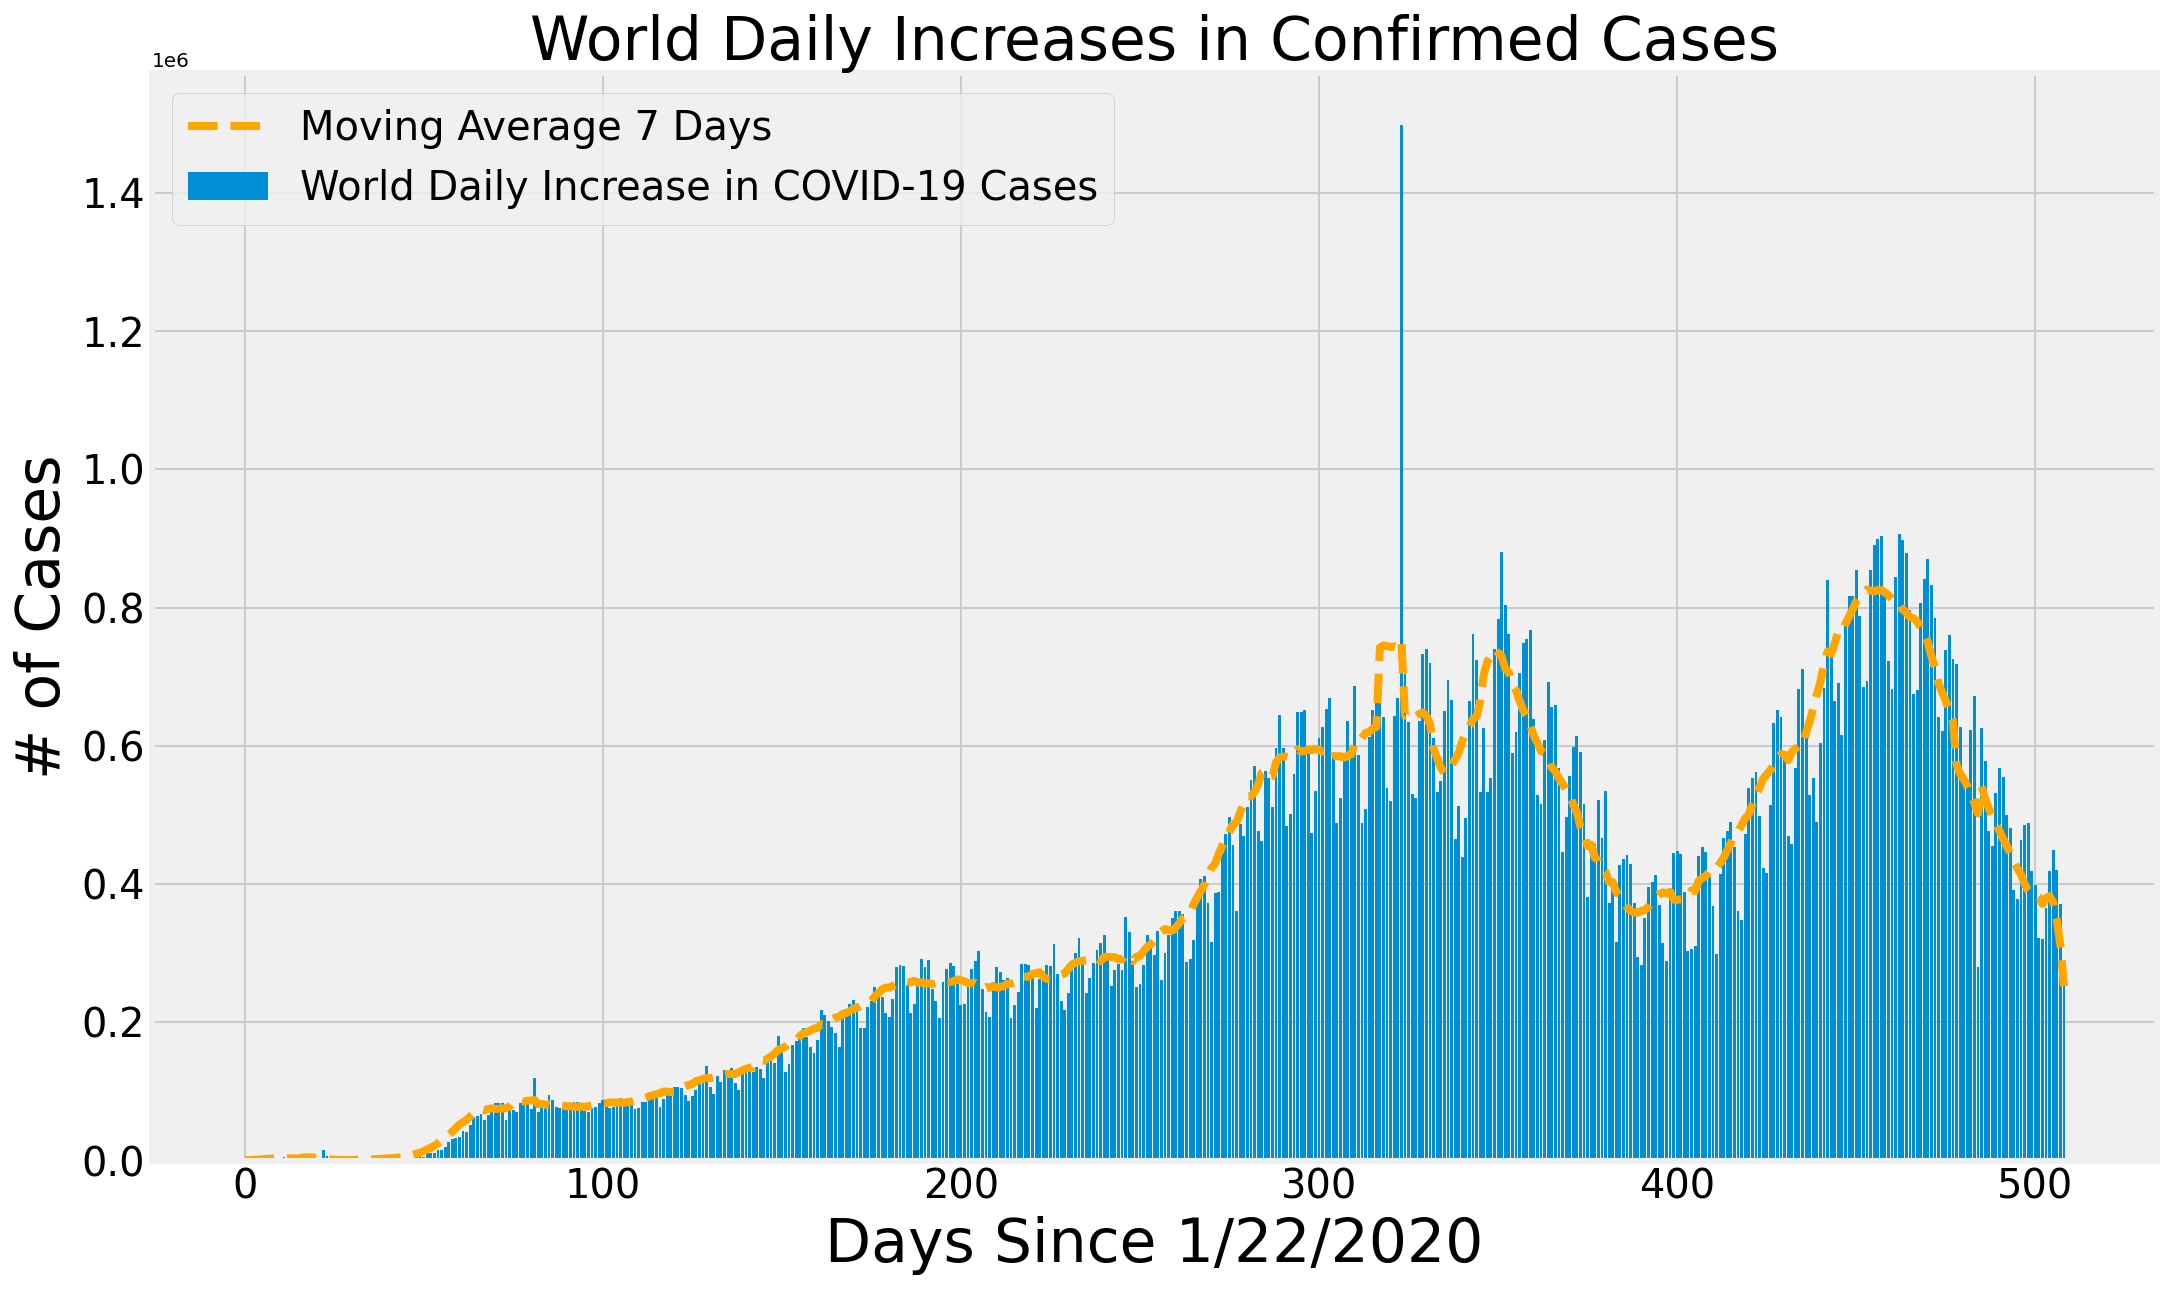

In [83]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, world_daily_increase)
plt.plot(adjusted_dates, world_daily_increase_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


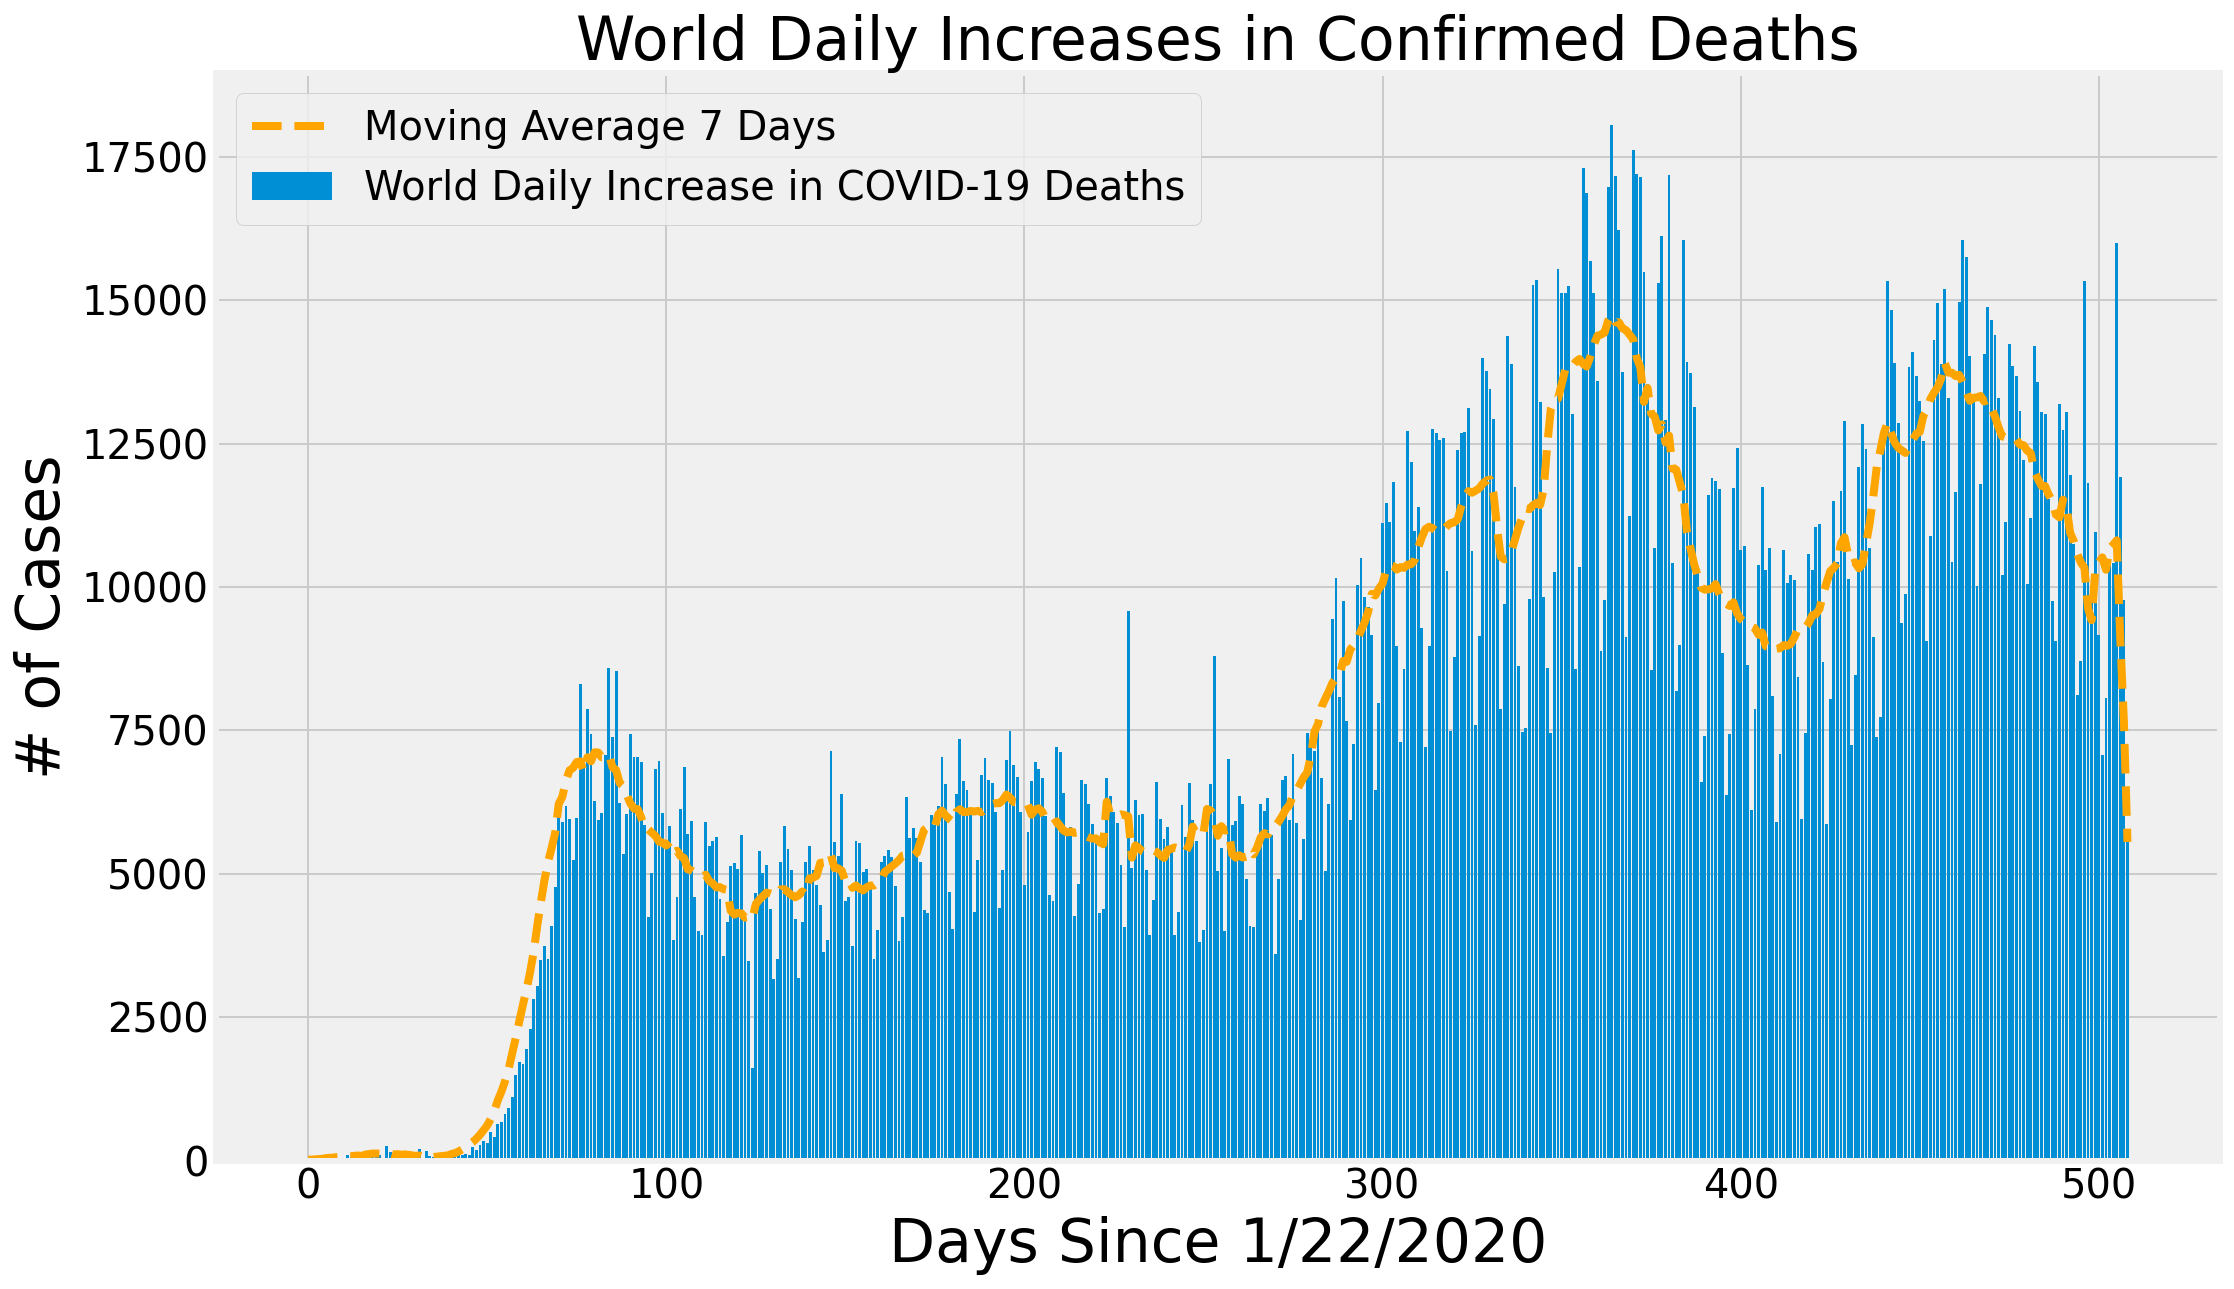

In [84]:
plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, world_daily_death)
plt.plot(adjusted_dates, world_daily_death_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Deaths'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

**Tình hình Covid tại Asean**

In [85]:
#to store and process data in dataframe
import pandas as pd

#for numeriacal analysis
import numpy as np

#for advance visualization
import seaborn as sns

# for basic visualization
import matplotlib.pyplot as plt

In [86]:
df_asean = case_country_df[(case_country_df["Country_Region"]=="Vietnam")|
                        (case_country_df["Country_Region"]=="Singapore")|
                        (case_country_df["Country_Region"]=="Laos")|
                        (case_country_df["Country_Region"]=="Myanmar")|
                        (case_country_df["Country_Region"]=="Malaysia")|
                        (case_country_df["Country_Region"]=="Brunei")|
                        (case_country_df["Country_Region"]=="Indonesia")|
                        (case_country_df["Country_Region"]=="Philippines")|
                        (case_country_df["Country_Region"]=="Thailand")|
                        (case_country_df["Country_Region"]=="Cambodia")]  

# check Countries
df_asean["Country_Region"].value_counts()

Philippines    1
Singapore      1
Malaysia       1
Laos           1
Cambodia       1
Brunei         1
Thailand       1
Indonesia      1
Vietnam        1
Name: Country_Region, dtype: int64

In [87]:
df_asean_clean=df_asean.drop(df_asean.columns[[2,3,9,10,11,12]],axis=1, inplace=True)

In [88]:
df_asean

,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Incident_Rate,ISO3
24,Brunei,2021-06-14 05:22:00,248.0,3.0,239,6,56.6879,BRN
30,Cambodia,2021-06-14 05:22:00,38969.0,348.0,32967,5654,233.083,KHM
80,Indonesia,2021-06-14 05:22:00,1911358.0,52879.0,1.74509e+06,113388,698.791,IDN
96,Laos,2021-06-14 05:22:00,2010.0,3.0,1880,127,27.6268,LAO
108,Malaysia,2021-06-14 05:22:00,657508.0,3908.0,580276,73324,2031.48,MYS
138,Philippines,2021-06-14 05:22:00,1315639.0,22788.0,1.23299e+06,59865,1200.61,PHL
156,Singapore,2021-06-14 05:22:00,62276.0,34.0,61869,373,1064.48,SGP
173,Thailand,2021-06-14 05:22:00,195909.0,1449.0,26873,167587,280.672,THA
188,Vietnam,2021-06-14 05:22:00,10630.0,59.0,3998,6573,10.9206,VNM


In [89]:
df_asean.to_csv('asean_covid.csv')

In [90]:
df = pd.read_csv('/content/asean_covid.csv')
data = df.copy()

state_details = pd.pivot_table(df, values=['Confirmed','Deaths','Recovered'], index='Country_Region', aggfunc='max')
#state_details['Deaths']['Madhya Pradesh#']=119

#state_details['Death']=state_details['Death']
#state_details=state_details.reset_index()
state_details['Active']=state_details['Confirmed']-state_details['Recovered']-state_details['Deaths']
state_details = state_details.sort_values(by='Confirmed', ascending= False)
state_details.style.background_gradient(cmap='PuBuGn')
state_details.style.bar(subset=['Confirmed'], color='#FDD017')\
                    .bar(subset=['Recovered'], color='lime')\
                    .bar(subset=['Deaths'], color='red')\
                    .bar(subset=['Active'], color='#0000FF')

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Indonesia,1911358.000000,52879.000000,1745091.000000,113388.000000
Philippines,1315639.000000,22788.000000,1232986.000000,59865.000000
Malaysia,657508.000000,3908.000000,580276.000000,73324.000000
Thailand,195909.000000,1449.000000,26873.000000,167587.000000
Singapore,62276.000000,34.000000,61869.000000,373.000000
Cambodia,38969.000000,348.000000,32967.000000,5654.000000
Vietnam,10630.000000,59.000000,3998.000000,6573.000000
Laos,2010.000000,3.000000,1880.000000,127.000000
Brunei,248.000000,3.000000,239.000000,6.000000


In [91]:
deaths_case = deaths_df[(deaths_df["Country/Region"]=="Vietnam")|
                        (deaths_df["Country/Region"]=="Singapore")|
                        (deaths_df["Country/Region"]=="Laos")|
                        (deaths_df["Country/Region"]=="Myanmar")|
                        (deaths_df["Country/Region"]=="Malaysia")|
                        (deaths_df["Country/Region"]=="Brunei")|
                        (deaths_df["Country/Region"]=="Indonesia")|
                        (deaths_df["Country/Region"]=="Philippines")|
                        (deaths_df["Country/Region"]=="Thailand")|
                        (deaths_df["Country/Region"]=="Cambodia")

                 
              ]  

# check Countries
deaths_case["Country/Region"].value_counts()
deaths_case

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21
31,,Brunei,4.5353,114.728,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
37,,Cambodia,11.55,104.917,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,110,114,114,114,120,126,131,136,142,147,147,150,154,156,159,164,165,167,176,179,183,190,194,196,203,209,214,220,230,236,242,252,263,266,278,289,300,311,320,335
148,,Indonesia,-0.7893,113.921,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,46349,46496,46663,46842,47012,47218,47465,47617,47716,47823,47967,48093,48305,48477,48669,48887,49073,49205,49328,49455,49627,49771,49907,50100,50262,50404,50578,50723,50908,51095,51296,51449,51612,51803,51992,52162,52373,52566,52730,52879
164,,Laos,19.8563,102.495,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
176,,Malaysia,4.21048,101.976,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1591,1610,1632,1657,1683,1700,1722,1761,1788,1822,1866,1902,1947,1994,2040,2099,2149,2199,2248,2309,2369,2432,2491,2552,2650,2729,2796,2867,2993,3096,3182,3291,3378,3460,3536,3611,3684,3768,3844,3908
210,,Philippines,12.8797,121.774,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,17800,17991,18099,18269,18472,18562,18620,18714,18821,18958,19051,19191,19262,19372,19507,19641,19763,19946,19951,19983,20019,20169,20379,20566,20722,20860,20966,21012,21158,21357,21537,21732,21898,21969,22064,22190,22312,22507,22652,22788
228,,Singapore,1.2833,103.833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,32,32,32,32,32,32,32,32,32,32,33,33,33,33,33,33,33,33,33,34,34,34,34,34,34
245,,Thailand,15.87,100.993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,318,336,363,382,399,421,452,486,518,548,565,589,614,649,678,703,735,759,776,806,832,873,920,954,988,1012,1031,1069,1107,1146,1177,1213,1236,1269,1297,1332,1375,1402,1431,1449
271,,Vietnam,14.0583,108.277,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,35,35,35,35,35,35,35,35,35,35,36,37,37,37,37,39,41,42,43,44,44,45,46,47,47,47,47,48,49,49,51,53,53,53,55,55,55,57,58,59


In [92]:
deaths_case.drop(deaths_case.columns[[0,2,3]],axis=1, inplace=True)
deaths_case

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21
31,Brunei,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
37,Cambodia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,110,114,114,114,120,126,131,136,142,147,147,150,154,156,159,164,165,167,176,179,183,190,194,196,203,209,214,220,230,236,242,252,263,266,278,289,300,311,320,335
148,Indonesia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,46349,46496,46663,46842,47012,47218,47465,47617,47716,47823,47967,48093,48305,48477,48669,48887,49073,49205,49328,49455,49627,49771,49907,50100,50262,50404,50578,50723,50908,51095,51296,51449,51612,51803,51992,52162,52373,52566,52730,52879
164,Laos,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
176,Malaysia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1591,1610,1632,1657,1683,1700,1722,1761,1788,1822,1866,1902,1947,1994,2040,2099,2149,2199,2248,2309,2369,2432,2491,2552,2650,2729,2796,2867,2993,3096,3182,3291,3378,3460,3536,3611,3684,3768,3844,3908
210,Philippines,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,17800,17991,18099,18269,18472,18562,18620,18714,18821,18958,19051,19191,19262,19372,19507,19641,19763,19946,19951,19983,20019,20169,20379,20566,20722,20860,20966,21012,21158,21357,21537,21732,21898,21969,22064,22190,22312,22507,22652,22788
228,Singapore,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,32,32,32,32,32,32,32,32,32,32,33,33,33,33,33,33,33,33,33,34,34,34,34,34,34
245,Thailand,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,318,336,363,382,399,421,452,486,518,548,565,589,614,649,678,703,735,759,776,806,832,873,920,954,988,1012,1031,1069,1107,1146,1177,1213,1236,1269,1297,1332,1375,1402,1431,1449
271,Vietnam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,35,35,35,35,35,35,35,35,35,35,36,37,37,37,37,39,41,42,43,44,44,45,46,47,47,47,47,48,49,49,51,53,53,53,55,55,55,57,58,59


In [93]:
deaths_case.to_csv('deaths_asean.csv', encoding="UTF-8" )

Text(0.5, 1.0, 'DEATHS CASE')

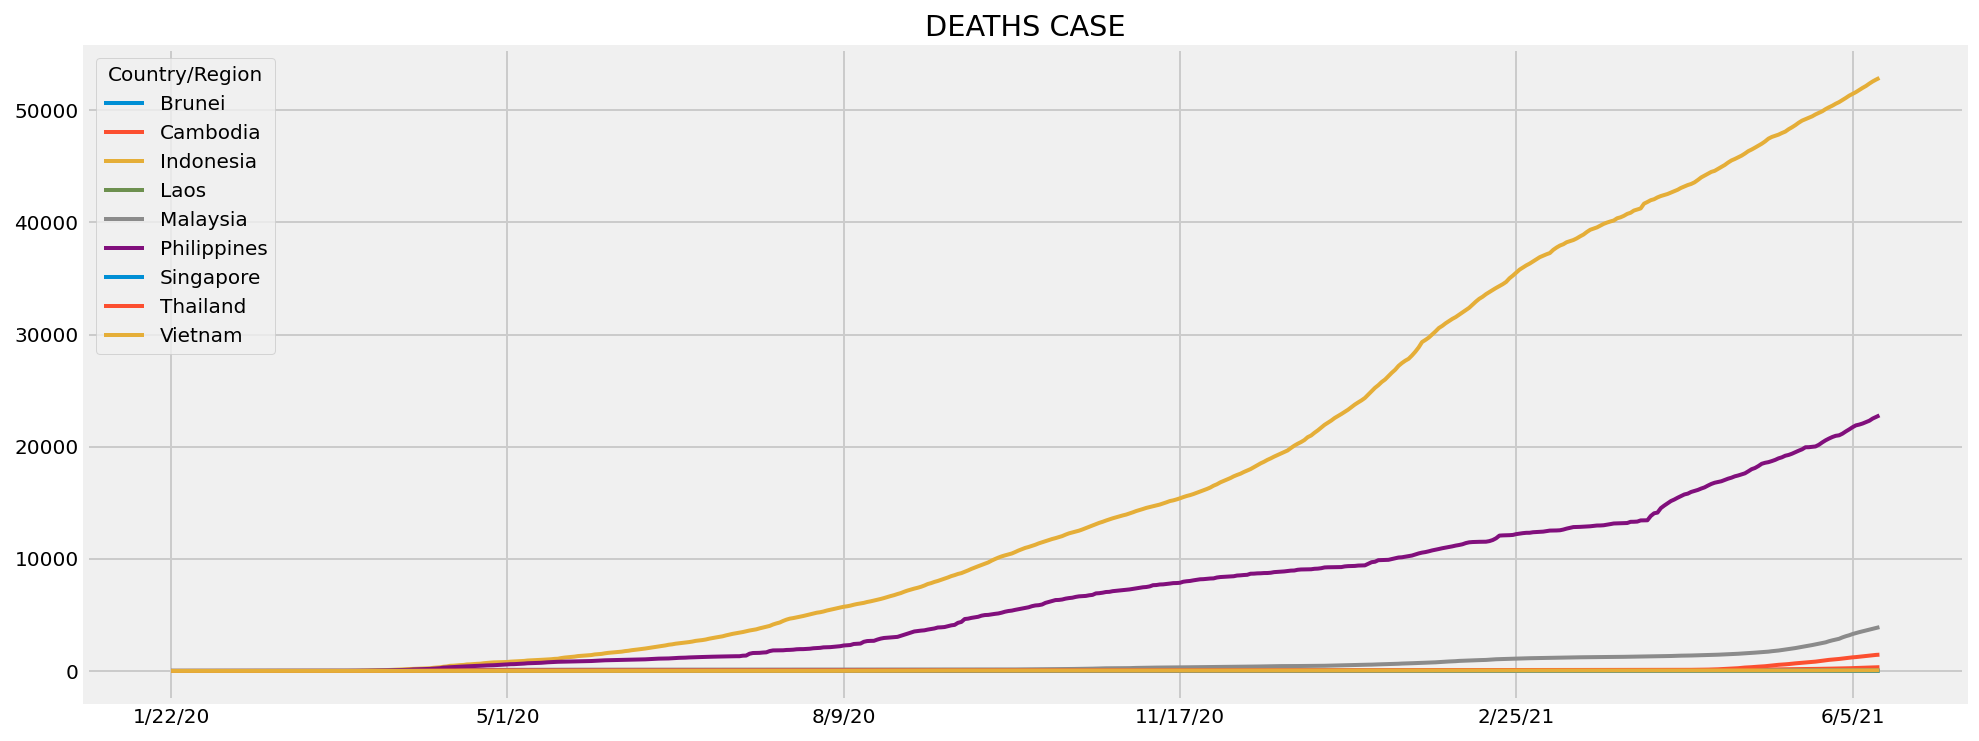

In [94]:
deaths_case.set_index('Country/Region').T.plot(figsize=(15,6),linewidth=2)
plt.title('DEATHS CASE')

In [95]:
import IPython

In [96]:
IPython.display.HTML('<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/6259762"><script src="https://public.flourish.studio/resources/embed.js"></script></div>')

In [97]:
df_asean_confirmed = confirmed_df[(confirmed_df["Country/Region"]=="Vietnam")|
                        (confirmed_df["Country/Region"]=="Singapore")|
                        (confirmed_df["Country/Region"]=="Laos")|
                        (confirmed_df["Country/Region"]=="Myanmar")|
                        (confirmed_df["Country/Region"]=="Malaysia")|
                        (confirmed_df["Country/Region"]=="Brunei")|
                        (confirmed_df["Country/Region"]=="Indonesia")|
                        (confirmed_df["Country/Region"]=="Philippines")|
                        (confirmed_df["Country/Region"]=="Thailand")|
                        (confirmed_df["Country/Region"]=="Cambodia")

                 
              ]  

# check Countries
df_asean["Country_Region"].value_counts()

Philippines    1
Singapore      1
Malaysia       1
Laos           1
Cambodia       1
Brunei         1
Thailand       1
Indonesia      1
Vietnam        1
Name: Country_Region, dtype: int64

In [98]:
df_asean_confirmed.drop(df_asean_confirmed.columns[[0,2,3]],axis=1, inplace=True)
df_asean_confirmed

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21
31,Brunei,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,228,228,229,230,230,230,230,231,232,232,232,232,232,232,235,235,235,235,235,236,236,240,241,241,241,241,242,244,244,244,244,244,244,244,246,246,248,248,248,248
37,Cambodia,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,16971,17621,18179,18717,19237,19743,20223,20695,21141,21499,21834,22184,22544,22889,23282,23697,24157,24645,25205,25761,26329,26989,27638,28237,28825,29404,30094,30710,31460,32189,33075,33613,34244,34833,35511,36240,36666,37321,37959,38427
148,Indonesia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1691658,1697305,1703632,1709762,1713684,1718575,1723596,1728204,1731652,1734285,1736670,1739750,1744045,1748230,1753101,1758898,1764644,1769940,1775220,1781127,1786187,1791221,1797499,1803361,1809926,1816041,1821703,1826527,1831773,1837126,1843612,1850206,1856038,1863031,1869325,1877050,1885942,1894025,1901490,1911358
164,Laos,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1072,1177,1205,1233,1302,1327,1362,1417,1482,1498,1570,1591,1638,1687,1737,1751,1763,1782,1801,1822,1878,1883,1895,1905,1908,1911,1912,1929,1934,1943,1952,1957,1963,1968,1970,1971,1975,1979,1990,1996
176,Malaysia,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,...,424376,427927,432425,436944,440677,444484,448457,453222,458077,462190,466330,470110,474556,479421,485496,492302,498795,505115,512091,518600,525889,533367,541224,549514,558534,565533,572357,579462,587165,595374,603122,610574,616815,622086,627652,633891,639562,646411,652204,657508
210,Philippines,0,0,0,0,0,0,0,0,1,1,1,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,1073555,1080172,1087885,1094849,1101990,1108826,1113547,1118359,1124724,1131467,1138187,1143963,1149925,1154388,1159071,1165155,1171403,1178217,1179812,1184706,1188672,1193976,1200430,1209154,1216582,1223627,1230301,1235467,1240716,1247899,1255337,1262273,1269478,1276004,1280773,1286217,1293687,1300349,1308352,1315639
228,Singapore,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,...,61268,61286,61311,61331,61359,61378,61403,61419,61453,61505,61536,61585,61613,61651,61689,61730,61770,61799,61824,61860,61890,61916,61940,61970,62003,62028,62051,62069,62100,62145,62158,62176,62196,62210,62219,62223,62236,62245,62224,62276
245,Thailand,4,4,5,6,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,34,34,35,35,35,35,35,35,35,35,37,40,40,41,42,...,74900,76811,78855,81274,83375,85005,86924,88907,93794,96050,99145,101447,111082,113555,116949,119585,123066,126118,129500,132213,135439,137894,143280,147039,151842,156370,159792,162022,165462,169348,171978,174796,177467,179886,182548,185228,187538,189828,193105,195909
271,Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,3030,3090,3137,3245,3412,3489,3571,3658,3740,3816,4112,4212,4359,4512,4720,4809,4941,5119,5275,5404,5931,6086,6356,6396,6908,7107,7432,7625,7870,8063,8364,8580,8791,9027,9222,9635,9835,10048,10337,10630


In [99]:
new=df_asean_confirmed.set_index('Country/Region').T

Text(0.5, 1.0, 'CONFIRMED')

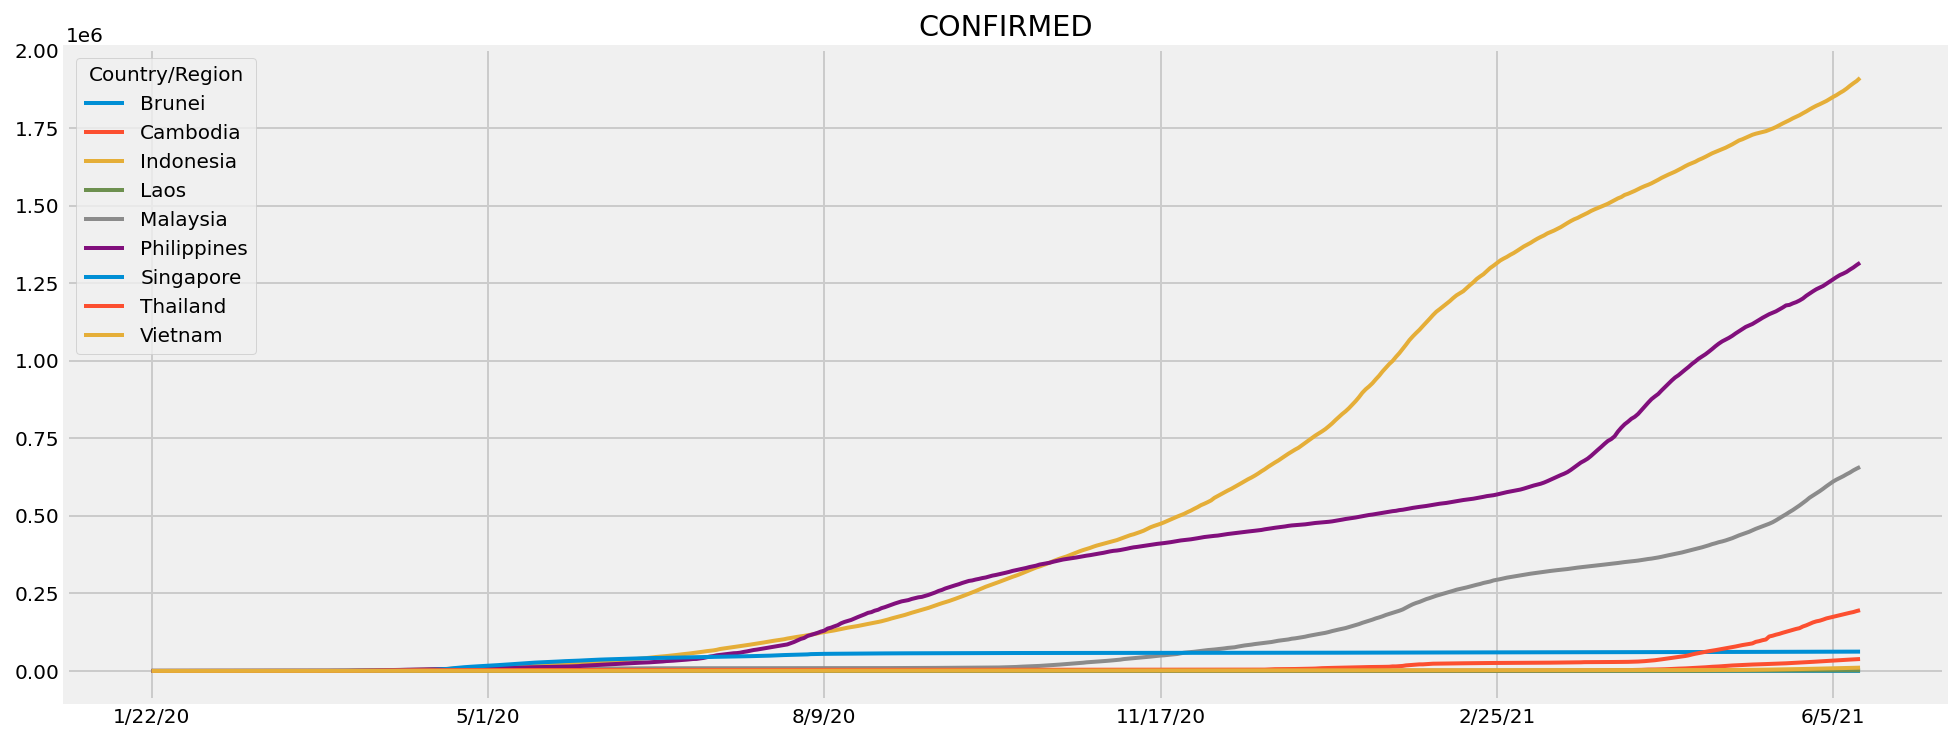

In [100]:
new.plot(figsize=(15,6),linewidth=2)
plt.title('CONFIRMED')

In [101]:
df_asean_confirmed.to_csv('confirmed_asean.csv', encoding="UTF-8" )

In [102]:
IPython.display.HTML('<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/6260031"><script src="https://public.flourish.studio/resources/embed.js"></script></div>')

In [103]:
recovered = recovered_df[(recovered_df["Country/Region"]=="Vietnam")|
                        (recovered_df["Country/Region"]=="Singapore")|
                        (recovered_df["Country/Region"]=="Laos")|
                        (recovered_df["Country/Region"]=="Myanmar")|
                        (recovered_df["Country/Region"]=="Malaysia")|
                        (recovered_df["Country/Region"]=="Brunei")|
                        (recovered_df["Country/Region"]=="Indonesia")|
                        (recovered_df["Country/Region"]=="Philippines")|
                        (recovered_df["Country/Region"]=="Thailand")|
                        (recovered_df["Country/Region"]=="Cambodia")

                 
              ]  

# check Countries
recovered["Country/Region"].value_counts()
recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21
31,,Brunei,4.5353,114.728,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,218,218,218,218,218,218,218,220,220,220,220,220,220,220,222,222,222,224,224,225,225,228,228,228,228,228,228,231,231,231,231,231,231,231,231,231,239,239,239,239
37,,Cambodia,11.55,104.917,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,6019,6843,6884,7340,7641,7820,8170,8539,9519,9867,10740,12120,13006,14343,14955,15700,16524,17164,17701,18359,19022,19772,20398,20900,21315,22188,22636,23389,24042,24763,25544,26078,27147,28092,28649,29047,29807,30617,31222,31858
133,,Indonesia,-0.7893,113.921,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1547092,1552532,1558423,1563917,1568277,1574615,1580207,1584878,1589079,1592886,1597067,1600857,1606611,1612239,1616603,1621572,1626142,1629495,1633045,1638279,1642074,1645263,1649187,1654557,1659974,1663998,1669119,1674479,1680501,1691593,1697543,1701784,1705971,1711565,1717370,1723253,1728914,1735144,1740436,1745091
149,,Laos,19.8563,102.495,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,99,101,122,150,232,238,297,328,431,513,555,574,582,686,708,740,800,1025,1074,1133,1180,1180,1281,1281,1402,1426,1543,1599,1599,1654,1680,1693,1714,1720,1773,1795,1807,1827,1859,1862
161,,Malaysia,4.21048,101.976,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,3,7,7,7,13,15,15,15,15,15,18,18,18,...,389846,392555,396004,398723,401934,405388,408236,411360,414707,418897,422329,426319,429103,432600,436116,440032,444540,449234,452821,456273,460062,464727,469325,474139,479666,484787,490038,496121,501898,508947,515571,521676,526809,534357,541319,548705,556030,563779,572113,580276
195,,Philippines,12.8797,121.774,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,993042,999011,1003160,1013204,1022224,1030367,1038175,1046431,1050643,1053523,1062427,1069868,1076428,1082725,1089613,1093602,1096109,1103945,1109226,1115806,1120452,1127770,1131942,1134818,1142246,1149010,1155045,1161252,1167426,1170752,1173006,1180998,1188243,1195181,1202257,1210027,1214454,1216497,1225359,1232986
213,,Singapore,1.2833,103.833,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,9,15,15,17,18,18,24,29,34,34,37,37,51,51,53,62,...,60844,60873,60906,60912,60933,60953,60975,61006,61029,61047,61062,61104,61123,61134,61183,61229,61242,61277,61294,61316,61329,61360,61372,61407,61423,61434,61459,61481,61523,61557,61580,61613,61635,61660,61702,61740,61765,61799,61799,61869
230,,Thailand,15.87,100.993,2,2,3,3,6,6,6,6,7,8,8,9,9,10,10,10,10,10,11,11,11,11,11,11,13,15,15,15,15,17,19,20,21,21,22,24,...,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873
256,,Vietnam,14.0583,108.277,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,6,6,7,7,7,7,7,7,7,7,14,14,14,14,16,16,...,2560,2560,2560,2602,2602,2618,2618,2636,2657,2657,2668,2668,2668,2687,2687,2687,2689,2721,2721,2794,2794,2853,2853,2896,2896,2950,3029,3043,3085,3085,3242,3310,3368,3509,3547,3636,3708,3804,3827,3998


In [104]:
recovered.drop(recovered.columns[[0,2,3]],axis=1, inplace=True)
recovered

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21
31,Brunei,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,218,218,218,218,218,218,218,220,220,220,220,220,220,220,222,222,222,224,224,225,225,228,228,228,228,228,228,231,231,231,231,231,231,231,231,231,239,239,239,239
37,Cambodia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,6019,6843,6884,7340,7641,7820,8170,8539,9519,9867,10740,12120,13006,14343,14955,15700,16524,17164,17701,18359,19022,19772,20398,20900,21315,22188,22636,23389,24042,24763,25544,26078,27147,28092,28649,29047,29807,30617,31222,31858
133,Indonesia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1547092,1552532,1558423,1563917,1568277,1574615,1580207,1584878,1589079,1592886,1597067,1600857,1606611,1612239,1616603,1621572,1626142,1629495,1633045,1638279,1642074,1645263,1649187,1654557,1659974,1663998,1669119,1674479,1680501,1691593,1697543,1701784,1705971,1711565,1717370,1723253,1728914,1735144,1740436,1745091
149,Laos,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,99,101,122,150,232,238,297,328,431,513,555,574,582,686,708,740,800,1025,1074,1133,1180,1180,1281,1281,1402,1426,1543,1599,1599,1654,1680,1693,1714,1720,1773,1795,1807,1827,1859,1862
161,Malaysia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,3,7,7,7,13,15,15,15,15,15,18,18,18,18,18,18,...,389846,392555,396004,398723,401934,405388,408236,411360,414707,418897,422329,426319,429103,432600,436116,440032,444540,449234,452821,456273,460062,464727,469325,474139,479666,484787,490038,496121,501898,508947,515571,521676,526809,534357,541319,548705,556030,563779,572113,580276
195,Philippines,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,993042,999011,1003160,1013204,1022224,1030367,1038175,1046431,1050643,1053523,1062427,1069868,1076428,1082725,1089613,1093602,1096109,1103945,1109226,1115806,1120452,1127770,1131942,1134818,1142246,1149010,1155045,1161252,1167426,1170752,1173006,1180998,1188243,1195181,1202257,1210027,1214454,1216497,1225359,1232986
213,Singapore,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,9,15,15,17,18,18,24,29,34,34,37,37,51,51,53,62,62,62,72,...,60844,60873,60906,60912,60933,60953,60975,61006,61029,61047,61062,61104,61123,61134,61183,61229,61242,61277,61294,61316,61329,61360,61372,61407,61423,61434,61459,61481,61523,61557,61580,61613,61635,61660,61702,61740,61765,61799,61799,61869
230,Thailand,2,2,3,3,6,6,6,6,7,8,8,9,9,10,10,10,10,10,11,11,11,11,11,11,13,15,15,15,15,17,19,20,21,21,22,24,24,28,28,...,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873,26873
256,Vietnam,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,6,6,7,7,7,7,7,7,7,7,14,14,14,14,16,16,16,16,16,...,2560,2560,2560,2602,2602,2618,2618,2636,2657,2657,2668,2668,2668,2687,2687,2687,2689,2721,2721,2794,2794,2853,2853,2896,2896,2950,3029,3043,3085,3085,3242,3310,3368,3509,3547,3636,3708,3804,3827,3998


In [105]:
recovered.to_csv('recovered_asean.csv', encoding="UTF-8")

Text(0.5, 1.0, 'Recovered')

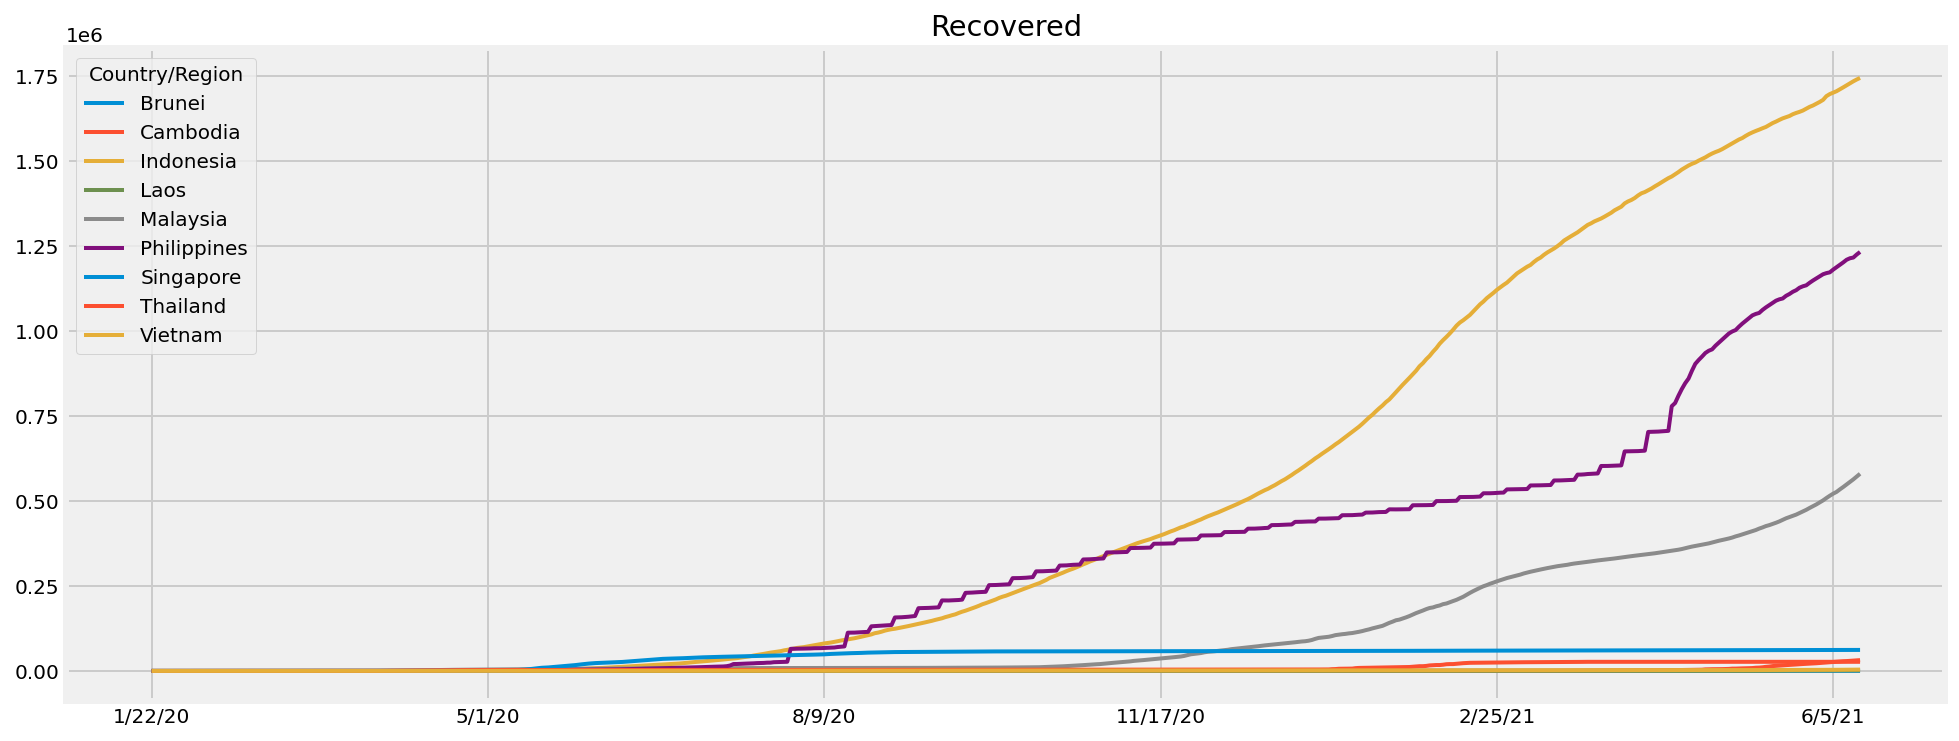

In [106]:
recovered.set_index('Country/Region').T.plot(figsize=(15,6),linewidth=2)
plt.title('Recovered')

In [107]:
IPython.display.HTML('<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/6260031"><script src="https://public.flourish.studio/resources/embed.js"></script></div>')

**Tình hình Covid tại Việt Nam**

In [108]:
vn_confirmed_df = confirmed_df[(confirmed_df['Country/Region']=='Vietnam')]  
print(vn_confirmed_df.shape)
vn_deaths_df = deaths_df[(deaths_df['Country/Region']=='Vietnam')]  
print(vn_deaths_df.shape)
vn_recovered_df = recovered_df[(recovered_df['Country/Region']=='Vietnam')]  
print(vn_recovered_df.shape)

(1, 513)
(1, 513)
(1, 513)


In [109]:
vn_confirmed_df = vn_confirmed_df.replace(np.nan,'',regex=True)
vn_deaths_df = vn_deaths_df.replace(np.nan,'',regex=True)
vn_recovered_df = vn_recovered_df.replace(np.nan,'',regex=True)

In [110]:
vn_confirmed_ts= vn_confirmed_df.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1)
vn_confirmed_ts_summary= vn_confirmed_ts.sum()

In [111]:
vn_confirmed_ts_summary.to_csv('vn_confirmed_ts_summary.csv')

In [112]:
fig_4=go.Figure(data=go.Scatter(x= vn_confirmed_ts_summary.index, y= vn_confirmed_ts_summary.values, mode ='lines+markers'))
fig_4.update_layout(title='Tổng số ca mắc Covid-19 tại Việt Nam',yaxis_title='Số ca',xaxis_tickangle=300)
fig_4.show()

In [113]:
vn_deaths_ts= vn_deaths_df.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1)
vn_deaths_ts_summary= vn_deaths_ts.sum()

In [114]:
vn_deaths_ts_summary.to_csv('vn_deaths_ts_summary.csv')

In [115]:
fig_5=go.Figure(data=go.Scatter(x= vn_deaths_ts_summary.index, y= vn_deaths_ts_summary.values, mode ='lines+markers'))
fig_5.update_layout(title='Tổng số ca tử vong do Covid-19 tại Việt Nam',yaxis_title='Số ca',xaxis_tickangle=300)
fig_5.show()

In [116]:
vn_recovered_ts= vn_recovered_df.copy().drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1)
vn_recovered_ts_summary= vn_recovered_ts.sum()

In [117]:
vn_recovered_ts_summary.to_csv('vn_recovered_ts_summary.csv')

In [118]:
fig_6=go.Figure(data=go.Scatter(x= vn_recovered_ts_summary.index, y= vn_recovered_ts_summary.values, mode ='lines+markers'))
fig_6.update_layout(title='Tổng số ca bình phục Covid-19 tại Việt Nam',yaxis_title='Số ca',xaxis_tickangle=300)
fig_6.show()

In [119]:
import IPython

In [120]:
IPython.display.HTML('<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/6260506"><script src="https://public.flourish.studio/resources/embed.js"></script></div>')

In [121]:
!pip install selenium
!pip install bs4
!pip install pandas
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import re
import pandas as pd
import os

from selenium.webdriver.chrome.options import Options
opts = Options()
opts.add_argument("user-agent=manhdd")

In [122]:
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic

In [123]:
#Get the soup
url = "https://ncov.moh.gov.vn/"
driver.get(url)
content = driver.page_source
soup = BeautifulSoup(content)

In [124]:
table=soup.find_all(id='sailorTable',attrs={'class':"table table-striped table-covid19"})

In [132]:
benh_nhan=[]
tuoi=[]
dia_diem=[]
tinh_trang=[]
quoc_tich=[]
data_1=table[0].find('tbody') #this is table 1

#Navigate the data from table 1 and fit them to the lists above
for row in data_1.find_all('tr'):
    benh_nhan.append(row.find_all('td')[0].string)
    tuoi.append(row.find_all('td')[1].string)
    dia_diem.append(row.find_all('td')[2].string)
    tinh_trang.append(row.find_all('td')[3].string)
    quoc_tich.append(row.find_all('td')[4].string)


IndexError: ignored

In [ ]:
df_1=pd.DataFrame({'Bệnh nhân':benh_nhan,'Tuổi':tuoi,'Địa điểm':dia_diem,'Tình trạng':tinh_trang,'Quốc tịch':quoc_tich})

In [ ]:
#Extract the data to a csv file
df_1.to_csv('So_lieu_ncovid_vietnam.csv',encoding="utf-8")

In [ ]:
So_lieu_ncovid_vietnam_df = pd.read_csv('So_lieu_ncovid_vietnam.csv')

In [ ]:
df = pd.read_csv('/content/covid_vn_theotinh.csv')
data = df.copy()

state_details = pd.pivot_table(df, values=['Confirmed','Death','Recovered'], index='Location', aggfunc='max')
#state_details['Deaths']['Madhya Pradesh#']=119

#state_details['Death']=state_details['Death']
#state_details=state_details.reset_index()
state_details['Active']=state_details['Confirmed']-state_details['Recovered']-state_details['Death']
state_details['Recovery Rate'] = round(state_details['Recovered'] / state_details['Confirmed'],6)
state_details['Death Rate'] = round(state_details['Death'] /state_details['Confirmed'], 6)
state_details = state_details.sort_values(by='Confirmed', ascending= False)
state_details.style.background_gradient(cmap='PuBuGn')
state_details.style.bar(subset=['Confirmed'], color='#FDD017')\
                    .bar(subset=['Recovered'], color='lime')\
                    .bar(subset=['Death'], color='red')\
                    .bar(subset=['Active'], color='#0000FF')